# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

## Откройте и изучите файл

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score 
from sklearn.dummy import DummyClassifier


In [2]:
df = pd.read_csv('/datasets/users_behavior.csv')

In [3]:
df

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
...,...,...,...,...,...
3209,122.0,910.98,20.0,35124.90,1
3210,25.0,190.36,0.0,3275.61,0
3211,97.0,634.44,70.0,13974.06,0
3212,64.0,462.32,90.0,31239.78,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


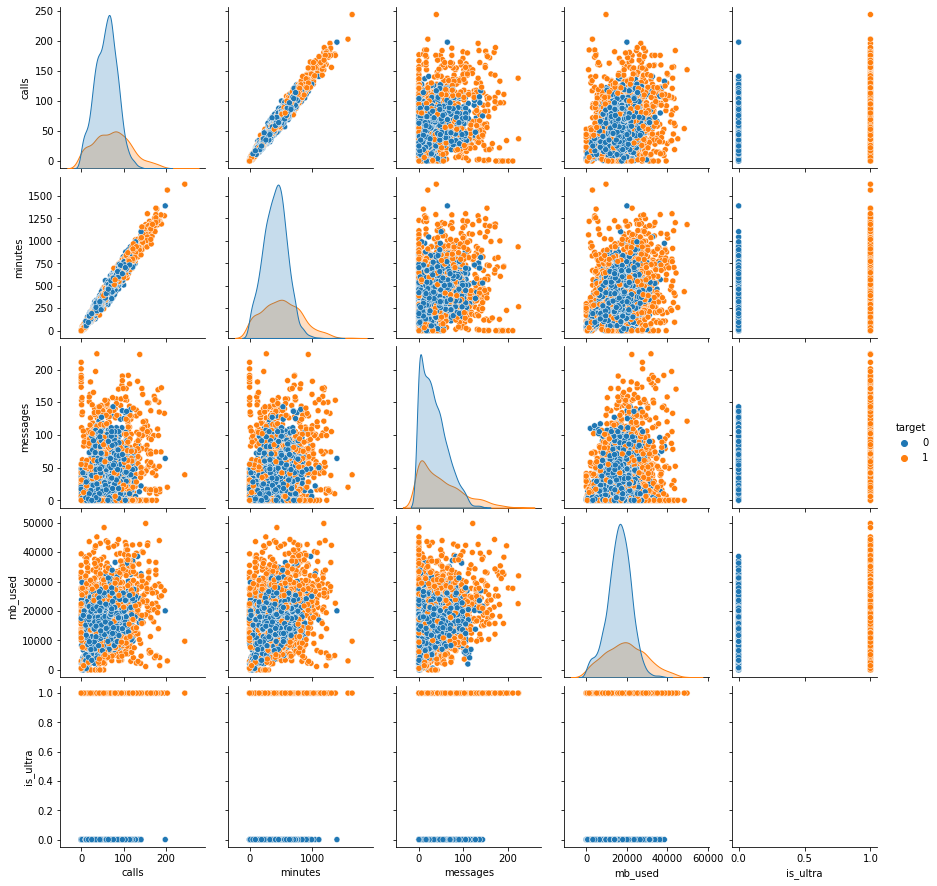

In [5]:
data_check = df  # Замените "your_data" на ваш DataFrame с данными
target_check = df['is_ultra']  # Замените "your_target_column" на имя вашего целевого признака
df_check = data_check.copy()
df_check['target'] = target_check

# Визуализация взаимосвязей с помощью pairplot
sns.pairplot(df_check, hue='target');

## Разбейте данные на выборки

In [6]:
features = df.drop(['is_ultra'], axis=1)
target = df['is_ultra']

In [7]:
features_train_intermediate, features_test, target_train_intermediate, target_test = train_test_split(
    features, target, test_size=0.2, random_state=12345)

In [8]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features_train_intermediate, target_train_intermediate, test_size=0.25, random_state=12345)

## Исследуйте модели

Так как перед нами стоит задача классификации, возьмём для исследования решающее древо, случайный лес и логистическую регрессию.

# Решающее древо 

In [19]:
model_tree = DecisionTreeClassifier()
model_tree.fit(features_train, target_train)
valid_predictions_tree = model_tree.predict(features_valid)
valid_accuracy_tree = accuracy_score(target_valid, valid_predictions_tree )

valid_accuracy_tree




0.7216174183514774

Результат - 0.72. До нижнего порога не дотягивает.

## Решающее древо (Гиперпараметры)

# Class_weight

In [20]:
model_tree_1 = DecisionTreeClassifier(class_weight='balanced')
model_tree_1.fit(features_train, target_train)


valid_predictions_tree_1 = model_tree_1.predict(features_valid)
valid_accuracy_tree_1 = accuracy_score(target_valid, valid_predictions_tree_1 )
valid_accuracy_tree_1

0.6982892690513219

class_weight (default=None): Параметр, позволяющий учесть возможные дисбалансы классов в целевой переменной. Если задано значение "balanced", модель автоматически настраивает веса классов, иначе каждому классу присваивается одинаковый вес. пример кода

Правда, на результат это повлияло не сильно.

# Criterion

In [21]:
model_tree_2 = DecisionTreeClassifier(criterion='entropy')
model_tree_2.fit(features_train, target_train)

valid_predictions_tree_2 = model_tree_2.predict(features_valid)
valid_accuracy_tree_2 = accuracy_score(target_valid, valid_predictions_tree_2 )
valid_accuracy_tree_2

0.71850699844479

Здесь изменили параметр 'criterion' с 'gini' на 'entropy'.

Gini impurity (индекс Джини): Gini impurity вычисляет, насколько чистыми или неоднородными являются классы в наборе данных. Он измеряет вероятность того, что случайно выбранный элемент будет неправильно классифицирован, если он случайно относится к классу на основе распределения классов в узле. Значение Gini impurity находится в диапазоне от 0 до 1, где 0 указывает на полную чистоту (все элементы принадлежат одному классу), а 1 указывает на максимальную неоднородность (классы равномерно распределены).

Entropy (энтропийный критерий): Энтропия измеряет степень неопределенности или разнородности классов в наборе данных. Чем ближе значение энтропии к 0, тем более однородными являются классы в узле, а чем ближе значение к 1, тем более неоднородными они являются. Энтропия также находится в диапазоне от 0 до 1.

Результат, конечно, стал лучше, но не сильно. До нижнего порога всё равно не дотягивает.

# Max_depth

In [12]:
for depth in range(1, 6):
    model_tree_3 = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    model_tree_3.fit(features_train, target_train) 

    predictions_valid = model_tree_3.predict(features_valid) 

    print("max_depth =", depth, ": ", end='')
    print(accuracy_score(target_valid, predictions_valid)) 

max_depth = 1 : 0.7387247278382582
max_depth = 2 : 0.7573872472783826
max_depth = 3 : 0.7651632970451011
max_depth = 4 : 0.7636080870917574
max_depth = 5 : 0.7589424572317263


Все вариации глубины, кроме первой, соответствуют минимальному порогу.

# Случайный лес 

In [17]:
best_model = None
best_result = 10000
best_depth = 0
best_est = 0
for est in range(10, 51, 10):
    for depth in range (1, 11):
        model_forest = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model_forest.fit(features_train, target_train)
        predictions_valid = model_forest.predict(features_valid)
        result = mean_squared_error(target_valid, predictions_valid) ** 0.5
        if result < best_result:
            best_model = model_forest
            best_result = result
            best_est = est
            best_depth = depth
            
model_forest = RandomForestClassifier(random_state=12345, n_estimators=best_est, max_depth=best_depth)   
model_forest.fit(features_train, target_train)


predictions_valid_forest = model_forest.predict(features_valid)


result_valid = accuracy_score(target_valid, predictions_valid_forest)


result_valid


0.7978227060653188

Результат - 0.79. В теории задание выполнено.

# Логистическая Регрессия

In [22]:
model_logistic = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000) 
model_logistic.fit(features_train, target_train) 



model_logistic.score(features_valid, target_valid)




0.7262830482115086

Результат - от 0.72. Не подходит.

## Тестрирование модели (Случайный лес)

In [15]:
predictions_test_forest = model_forest.predict(features_test)
result_test = accuracy_score(target_test, predictions_test_forest)
result_test

0.7993779160186625

0.799. Результат подтверждён.

## Вывод

Побеждает модель случайного леса с результатом 0.79, а также модели решающего древа с настройкой глубины.

## (бонус) Проверьте модели на адекватность

In [16]:
dummy_model = DummyClassifier(strategy='most_frequent')
dummy_model.fit(features_train, target_train)

dummy_pred_valid = dummy_model.predict(features_valid)
dummy_pred_test = dummy_model.predict(features_test)


dummy_accuracy_valid = accuracy_score(target_valid, dummy_pred_valid)
dummy_accuracy_test = accuracy_score(target_test, dummy_pred_test)
print(f"Точность фиктивной модели: {dummy_accuracy_valid}")
print(f"Точность фиктивной модели: {dummy_accuracy_test}")

Точность фиктивной модели: 0.6889580093312597
Точность фиктивной модели: 0.6951788491446346


Результат уступает всем выше приведённым моделям, но отличается от них не сильно.